## Final Project Submission

Please fill out:
* Student name: Michael Mathews Jr
* Student pace: part time
* Scheduled project review date/time: April 21, 2020. 4pm EST.
* Instructor name: Eli Thomas
* Blog post URL: https://medium.com/@M_84821/predicting-house-sale-prices-in-king-county-washington-9bd24f1bf2c4

## Import neccessary libraries and the data first!

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

from statsmodels.formula.api import ols

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv')

In [3]:
print(df.shape)
df.head(8)

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711


# Column Descriptions

* **id** - unique identified for a house
* **date** - Date house was sold
* **price** -  Price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** -  Square footage of the home
* **sqft_lot** - Square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Pre-processing: Checking and acting on null or strange values that don't fit.

In [4]:
# Checking for null values.
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# I am going to fill null values with '0' because I'll assume there is no waterfront view, home hasn't 
# been renovated, and no one has viewed the property yet.
df['view'] = df['view'].fillna(0)
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [6]:
# sqft_basement includes 454 records with a '?'.
df['sqft_basement'].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [7]:
# replacing the '?' with 0.0 values.
df['sqft_basement'] = (df['sqft_basement'].map(
    lambda x: 0.0 if x == '?' else x)).astype(float)

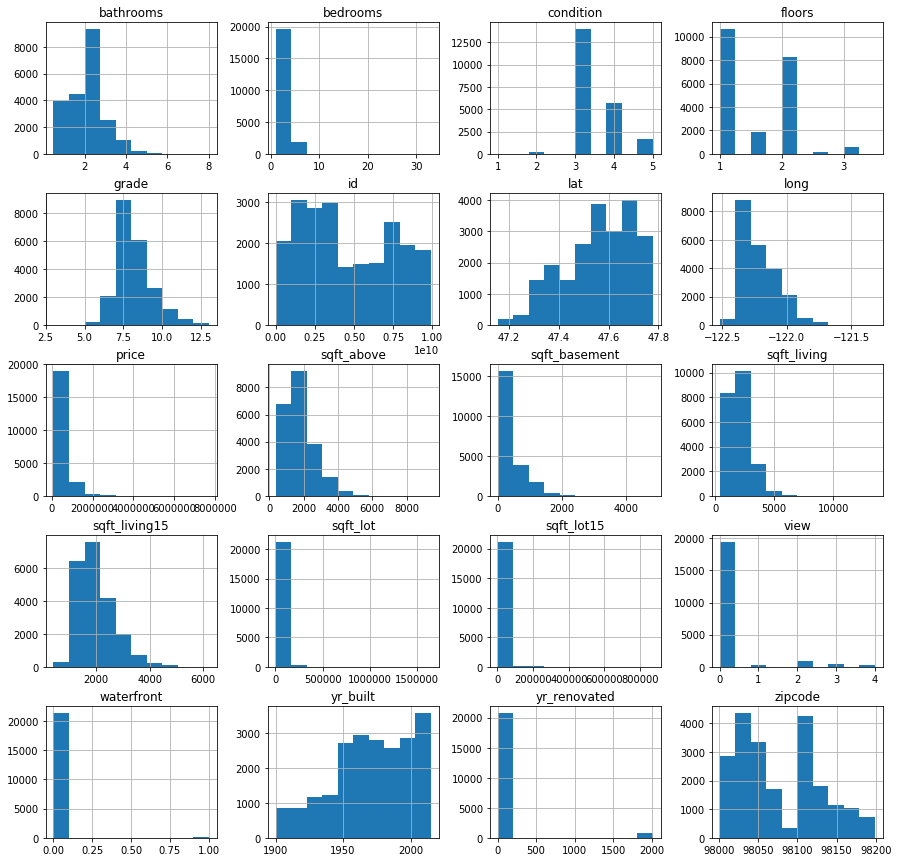

In [8]:
# Checking for distribution of variables in histogram plots.
df.hist(figsize=(15,15));

## Pre-processing: Checking for and acting on outliers in the data.

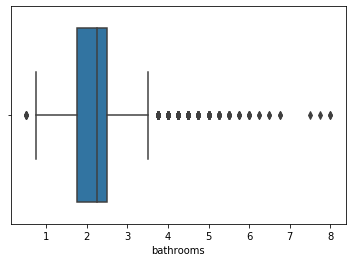

In [9]:
# Checking for bathroom outliers.
sns.boxplot(x=df['bathrooms']);

In [10]:
# Removing bathroom outliers.
df = df[df['bathrooms'] < 4]
print(df.shape)

(21195, 21)


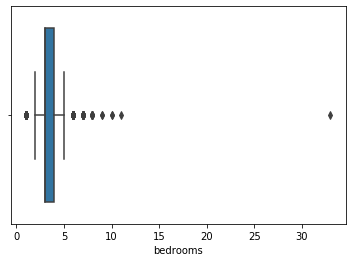

In [11]:
# Checking for bedroom outliers.
sns.boxplot(x=df['bedrooms']);

In [12]:
# Removing records with bedroom outliers.
df = df[df['bedrooms'] < 6]
print(df.shape)

(20944, 21)


(337, 21)

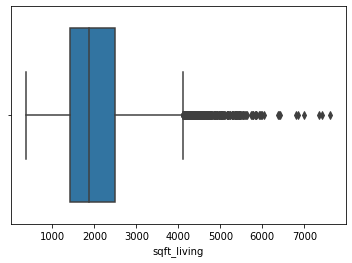

In [13]:
# Checking for outliers in sqft_living.
sns.boxplot(x=df['sqft_living'])
(df[df.sqft_living > 4200]).shape

In [14]:
# Removing 337 records from data set where sqft_living > 4200.
df = df[df['sqft_living'] < 4200]

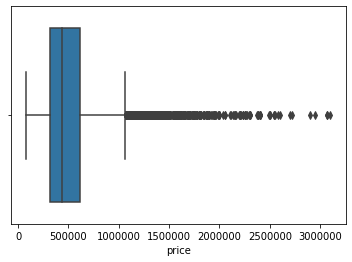

In [24]:
# Checking for outliers in price.
sns.boxplot(x=df['price']);

In [25]:
# Removing pricing outliers. I decided to cut it off at $1.5 million homes. This removes 224 records.
df = df[df['price'] < 1500000]
print(df.shape)

(20366, 23)


## Pre-processing: Transforming the data to normalized distributions.

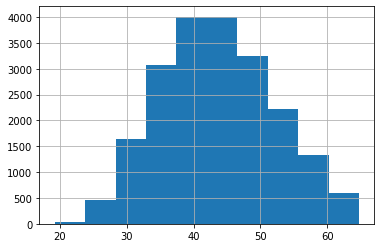

In [15]:
# Square root transformation on sqft_living.
df['sqft_living'] = np.sqrt(df['sqft_living'])
df['sqft_living'].hist();

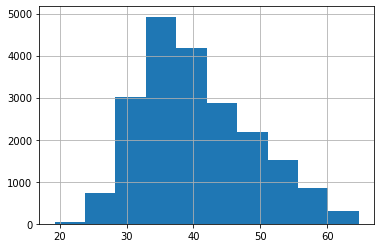

In [16]:
# Square root transformation of sqft_above.
df['sqft_above'] = np.sqrt(df['sqft_above'])
df['sqft_above'].hist()

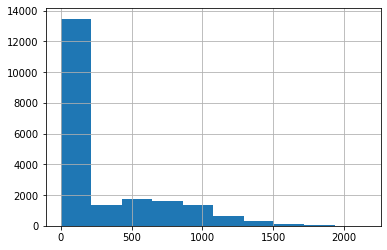

In [17]:
# There looks to be a ton of houses without a basement, so I decided to create a boolean field instead.
df['sqft_basement'].hist();

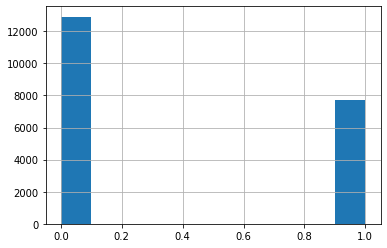

In [18]:
df['basement'] = df.apply(lambda row: 0 if row['sqft_basement'] == 0 else 1, axis=1)
df['basement'].hist();

In [19]:
# Creating age of home variable.
df['age'] = (2020 - df['yr_built'])
df.age.head(3)

0    65
1    69
2    87
Name: age, dtype: int64

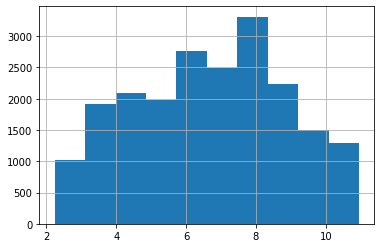

In [20]:
# Square root transformation of home age.
df.age = np.sqrt(df['age'])
df['age'].hist();

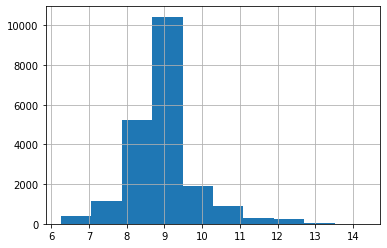

In [21]:
# Log transformation of sqft_lot.
df['sqft_lot'] = np.log(df['sqft_lot'])
df['sqft_lot'].hist();

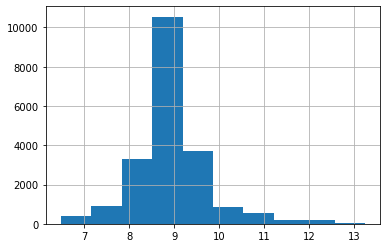

In [22]:
# Log transformation of sqft_lot15.
df['sqft_lot15'] = np.log(df['sqft_lot15'])
df['sqft_lot15'].hist();

In [23]:
# There are a lot of homes that haven't been viewed. I thought I'd create a boolean field instead.
df['view'] = df.apply(lambda row: 0 if row['view'] == 0 else 1, axis=1)

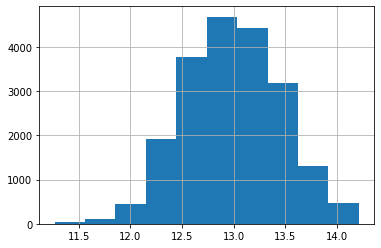

In [26]:
# Log transformation of price.
df['price_log'] = np.log(df['price'])
df['price_log'].hist();

## Pre-processing: Scaling my features

In [27]:
# Min-max scaling.
df['price_log'] = ( df.price_log - min(df.price_log) ) / ( max(df.price_log) - min(df.price_log) )
df['sqft_living'] = ( df.sqft_living - min(df.sqft_living) ) / ( max(df.sqft_living) - min(df.sqft_living) )
df['sqft_above'] = ( df.sqft_above - min(df.sqft_above) ) / ( max(df.sqft_above) - min(df.sqft_above) )
df['sqft_living15'] = ( df.sqft_living15 - min(df.sqft_living15) ) / ( max(df.sqft_living15) - min(df.sqft_living15) )

## Pre-processing: Updating features to "Category" data type and substituting dummy variables for each category.

In [28]:
# Upding data type for categorical features
df.waterfront = df.waterfront.astype('int').astype('category')
df.view = df.view.astype('int').astype('category')
df.condition = df.condition.astype('int').astype('category')
df.grade = df.grade.astype('int').astype('category')
df.bedrooms = df.bedrooms.astype('float').astype('category')
df.floors = df.floors.astype('float').astype('category')
df.bathrooms = df.bathrooms.astype('float').astype('category')
df.basement = df.basement.astype('int').astype('category')

In [29]:
# Creating dummy variables for category features.
waterfront_dummies = pd.get_dummies(df.waterfront, prefix='wat', drop_first=True)
basement_dummies = pd.get_dummies(df.basement, prefix='base', drop_first=True)
view_dummies = pd.get_dummies(df.view, prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(df.condition, prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(df.grade, prefix='gra', drop_first=True)
bedroom_dummies = pd.get_dummies(df.bedrooms, prefix='bed', drop_first=True)
bedroom_floors = pd.get_dummies(df.floors, prefix='fl', drop_first=True)
bathrooms_dummies = pd.get_dummies(df.bathrooms, prefix='bath', drop_first=True)

df = df.drop(['waterfront','view','condition', 'grade', 'bedrooms', 'floors', 'bathrooms', 'basement'], axis=1)

df = pd.concat([df, waterfront_dummies, view_dummies, condition_dummies, grade_dummies,
               bedroom_dummies, bedroom_floors, bathrooms_dummies, basement_dummies], axis=1)

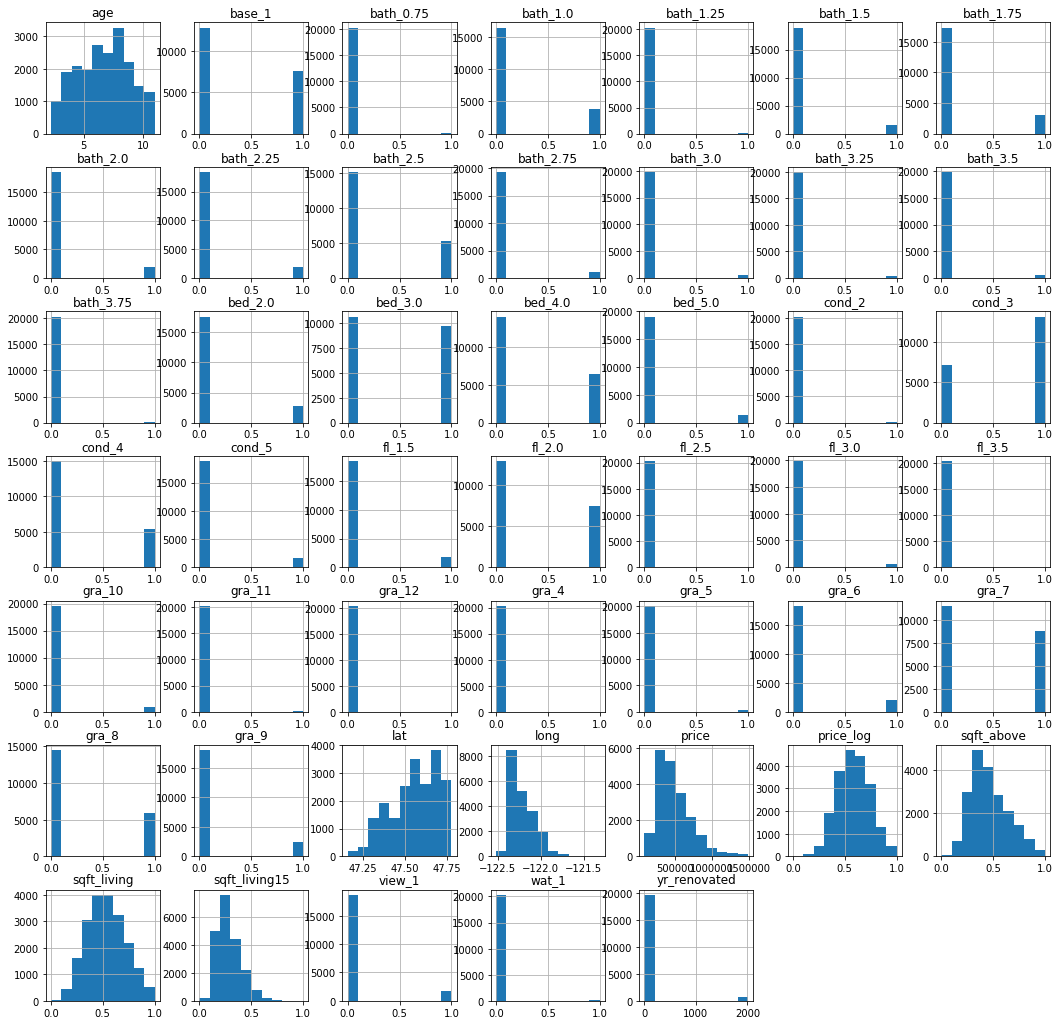

In [51]:
# Reviewing my variable transformations, min max scaling & dummies in histogram plots. 
df.hist(figsize=(18,18));

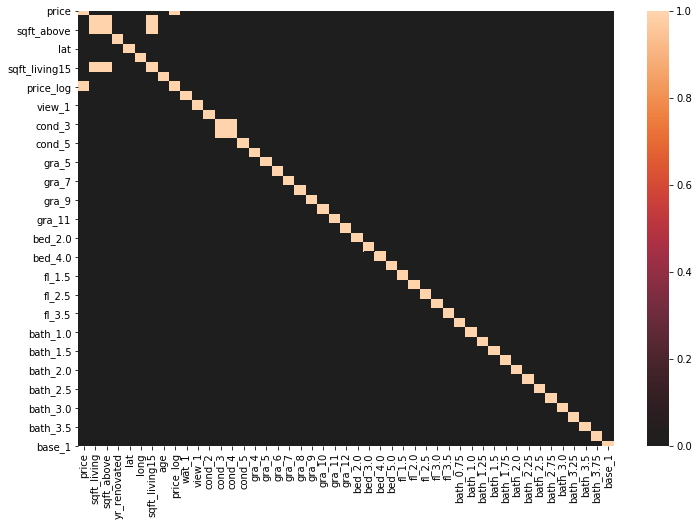

In [50]:
# Checking for correlation of features.
# Checking for issues with mulitcollinearity.
plt.figure(figsize=(12,8))
sns.heatmap(abs(df.corr())>0.70, center=0);

In [32]:
# After reviewing my transformed variables and correlation heatmap, I have decided to drop some fields:
df.drop(['id', 'date', 'zipcode', 'sqft_basement', 'sqft_lot', 'sqft_lot15', 'yr_built'], axis=1, inplace=True)
# sqft_basement was replaced with a boolean value 'basement'.

# Splitting the data before selecting features for the model.

In [33]:
X = df.drop(['price', 'price_log'], axis=1)
y = df['price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=25)

# Selecing my features and modeling

In [34]:
# I'm going to select features using scikit-learn's Recursive Feature Elimination module.
# Then I'll fit the model with linear regression.

linreg = LinearRegression(fit_intercept=True)
selector = RFE(linreg, n_features_to_select=50)
selector = selector.fit(X_train, y_train)

In [35]:
y_hat_train = selector.predict(X_train)
y_hat_test = selector.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

## Analyzing contribution of co-efficients in my model.

In [47]:
# Predictor contribution percentage (table)

X = X
y = y
model_reg = LinearRegression()
linreg.fit(X, y)
model_coef = pd.DataFrame()
preds = list()
coef_log = list()
coef = list()
sum_coef = 0
percent_coef = list()
i = 0
for col in X.columns:
    preds.append(X.columns.values[i])
    coef_log.append(linreg.coef_[i])
    coef.append(10**(linreg.coef_[i]))
    sum_coef += 10**(linreg.coef_[i])
    i += 1
model_coef['Predictor'] = preds
model_coef['Coefficient(log)'] = coef_log
model_coef['Coefficient'] = coef
for c in model_coef.Coefficient:
    percent_coef.append(c/sum_coef*100)
model_coef['Contribution(%)'] = percent_coef
model_coef.sort_values(by=['Coefficient'], ascending=False)

,Predictor,Coefficient(log),Coefficient,Contribution(%)
3,lat,0.453064,2.838336,5.349553
5,sqft_living15,0.188779,1.544468,2.910936
43,bath_3.75,0.158404,1.440137,2.714297
0,sqft_living,0.145804,1.398955,2.636680
42,bath_3.5,0.144195,1.393784,2.626933
7,wat_1,0.135987,1.367688,2.577749
41,bath_3.25,0.134878,1.364199,2.571173
33,bath_1.25,0.129517,1.347464,2.539633
40,bath_3.0,0.126681,1.338694,2.523102
39,bath_2.75,0.124645,1.332432,2.511301


### It is interesting to me that 8 of the top 12 co-efficients are related to the number of bathrooms in the home. Bathrooms are not highly correlated with any other features in the model, they're not even highly correlated with eachother. It is also interesting that the bedroom co-efficients are about half that of the bathrooms. My guess as to why this is, is that bedroom counts in a home can be easily skewed because the idea of a "bed" room can be an opinion, where as, a bathroom is undeniable, so that data is more consistent.

## Scoring my model

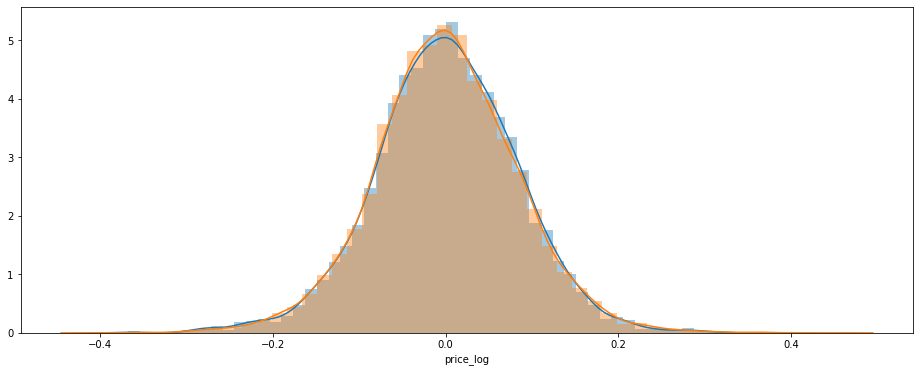

In [36]:
# Distribution of residuals

plt.figure(figsize=(16,6))
sns.distplot(test_residuals)
sns.distplot(train_residuals)
plt.show();

In [37]:
# Evaluate mean squared error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0069305859971081655
Test Mean Squarred Error: 0.006741194210387449


In [38]:
# Root mean squared error

print(np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

0.08325014112365316
0.08210477580742456


In [41]:
# Scikitlearn's R2 score:
R2 = sklearn.metrics.r2_score(y_test, y_hat_test)
R2

0.7238644646579269

In [45]:
# Adjusted R2 score:
Adj_R2 = 1-(1-R2)*(len(X_train)-1)/(len(X_train)-(len(X_train.columns))-1)
Adj_R2

0.7230484613028971

### The End! I think that an adjusted R2 score of 0.72 is acceptable but can be improved on. In order to improve it I would have to attempt more combinations of transformations, scaling and feature selection.